<a href="https://colab.research.google.com/github/ZBHlily/Summer22-MicroCredential/blob/main/COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [ ]:
# importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv') # reading into the data

In [ ]:
df.head() # printing the first five elments of data

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
df.shape # printing the size of the dataset (rows, columns)

(48054, 5)

In [ ]:
df.columns # seeing how many colmns are in it

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [ ]:
ny_df = df[df['state']=='New York'] # only selecting those under the column state that has New York 
ny_df

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0
...,...,...,...,...,...
47808,2022-07-14,New York,36,5691891,69223
47864,2022-07-15,New York,36,5700453,69245
47920,2022-07-16,New York,36,5703638,69245
47976,2022-07-17,New York,36,5706285,69245


In [ ]:
ny_df.head() # printing the first five that satisfy the above cell

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [ ]:
ny_df.shape # printing shape of data that satisfies the condition 

(870, 5)

In [ ]:
ny_df.tail() # printing the last five rows

,date,state,fips,cases,deaths
47808,2022-07-14,New York,36,5691891,69223
47864,2022-07-15,New York,36,5700453,69245
47920,2022-07-16,New York,36,5703638,69245
47976,2022-07-17,New York,36,5706285,69245
48032,2022-07-18,New York,36,5722320,69268


In [ ]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0] # those that have ny as the state, we wnat to find out which deaths aren't equal to 0 
first_ny_death.head() # printing the first five rows of that condition 

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [ ]:
first_ny_death.tail() # printing the last five rows 

,date,state,fips,cases,deaths
47808,2022-07-14,New York,36,5691891,69223
47864,2022-07-15,New York,36,5700453,69245
47920,2022-07-16,New York,36,5703638,69245
47976,2022-07-17,New York,36,5706285,69245
48032,2022-07-18,New York,36,5722320,69268


In [ ]:
#total number of cases
ny_df['cases'].max() 

5722320

In [ ]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

1909853094

Finding new covid 19 cases on daily basis (new cases added everyday)

In [ ]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows(): # Iterate over DataFrame rows as (index, Series) pairs.
  current_case = row['cases'] 
  newcase_count = current_case - previuos_case # checking how many new cases there are 
  previuos_case = current_case
  newcase.append(newcase_count) # storing it in a list
  # print(newcase_count)

print(current_case)
print(newcase_count)

5722320
16035


In [ ]:
ny_df['new_cases'] = newcase # added new row called new_cases 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ny_df.head(10) # printing the first 10 rows

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [31]:
ny_df.tail(10) # printing the last 10 rows

,date,state,fips,cases,deaths,new_cases
47528,2022-07-09,New York,36,5650598,69118,3128
47584,2022-07-10,New York,36,5653107,69118,2509
47640,2022-07-11,New York,36,5668334,69141,15227
47696,2022-07-12,New York,36,5676121,69182,7787
47752,2022-07-13,New York,36,5682130,69201,6009
47808,2022-07-14,New York,36,5691891,69223,9761
47864,2022-07-15,New York,36,5700453,69245,8562
47920,2022-07-16,New York,36,5703638,69245,3185
47976,2022-07-17,New York,36,5706285,69245,2647
48032,2022-07-18,New York,36,5722320,69268,16035


In [ ]:
ny_df['new_cases'].sum() # prints sum of only the new_cases row

5722320

In [ ]:
# setting variables to contain only one row
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

print(ny_cases)

246            1
261            1
276            2
293           11
313           22
          ...   
47808    5691891
47864    5700453
47920    5703638
47976    5706285
48032    5722320
Name: cases, Length: 870, dtype: int64


In [ ]:
type(ny_new_cases) # checking the type of it

pandas.core.series.Series

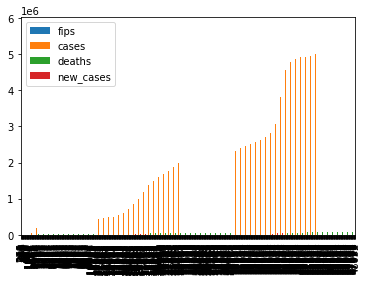

In [34]:
ny_df.plot(kind='bar') # plotting a bar graph 

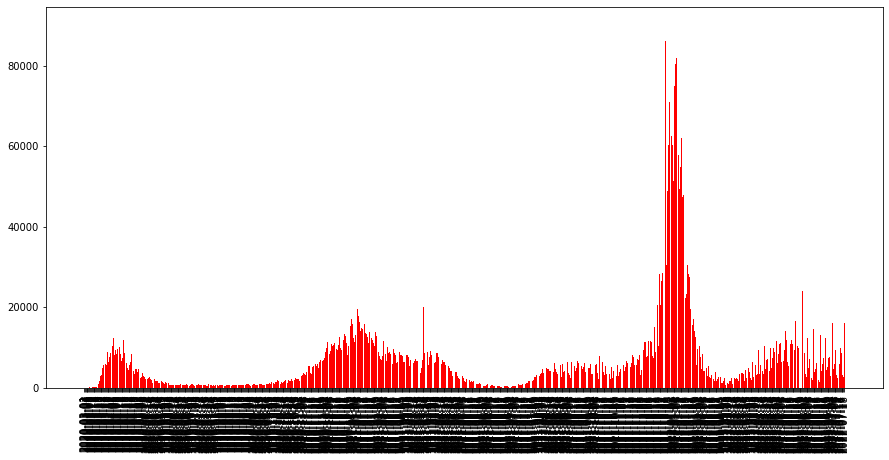

In [40]:
# creating a plot to show how many new cases there are 
plt.figure(figsize=(15,7)) # figsize is a tuple of the width and height of the figure in inches
plt.bar(x=ny_dates, height=ny_new_cases, color='red') # setting the x and hte height 
plt.xticks(rotation=90) # putting in tick marks 
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [ ]:
# getting infor in the last 30 days 
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]
ny_cases_30

In [ ]:
# ny_dates_30

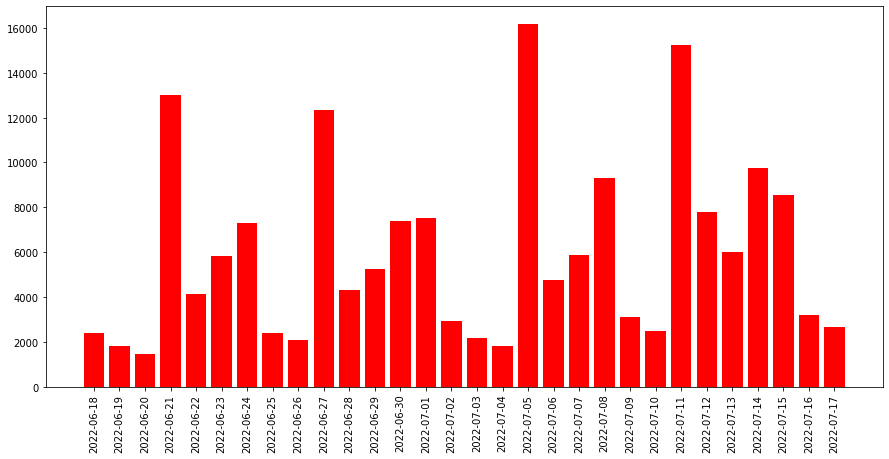

In [ ]:
# we are plotting it to see how many new cases were in the last 30 days 
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

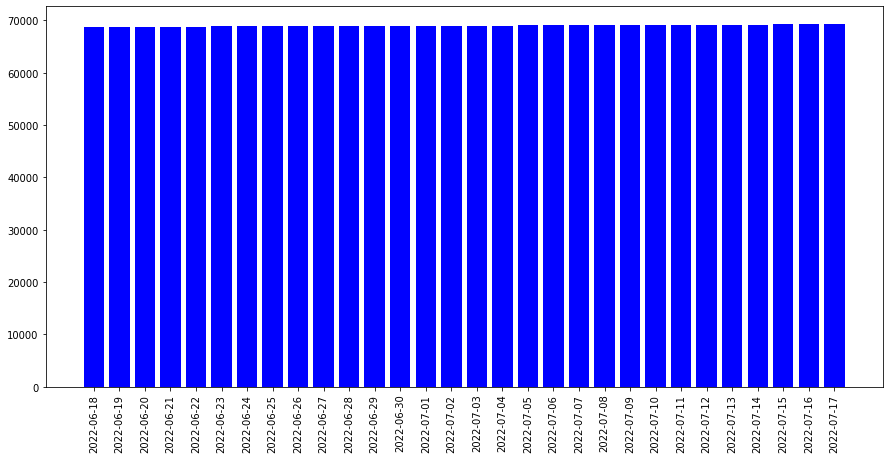

In [ ]:
# plot to show how many deaths in the last 30 days 
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [ ]:
states = ['New York', 'California','Florida', 'Texas','Arizona'] # selecting only certain states to compare in a list

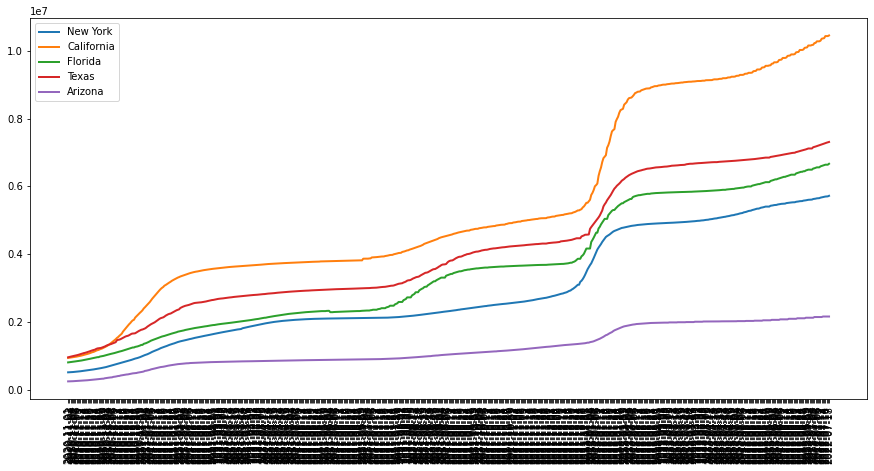

In [ ]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')] # condition to only look for those states and after a certain datae 
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusions:



1.   Conclusion 1
     --Your text here
2.   Conclusion 2
     --Your text here>



# Notes:

Analyzing New York state data for Covid 19
*   During the month of april, there are fewer cases(<100) but once july starts, the cases increase rapidly to 5691891 on 2022-07-14	
*   List item

